In [2]:
import pandas as pd 
import matplotlib.pyplot as plt  
import scipy.stats as st 
import numpy as np 
import datetime as dt 
import seaborn as sns

In [3]:
# increase max number of columns and rows visible and read in master data file
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 45)
price_df = pd.read_csv('../all_listings_df')
price_df.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,NaN,1 bath,2.0,2.0,90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,2.87,Denver
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,1,1,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,1,0.50,Denver
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,NaN,1 shared bath,NaN,1.0,64.0,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,4.04,Denver
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,NaN,1 shared bath,NaN,1.0,57.0,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,0.95,Denver
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,NaN,1 private bath,NaN,2.0,33.0,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,1.39,Denver


In [4]:
# row count
# price_df

In [5]:
# check for null values in 'price'
null_counts_price = price_df['price'].isna().sum()
print(null_counts_price)

0


In [6]:
# Create occupancy dataframe

occ_df = pd.DataFrame(price_df[["id", "price", "accommodates", "bathrooms_text", "beds", "city"]])

occ_df = occ_df.set_index("id")
occ_df

,price,accommodates,bathrooms_text,beds,city
id,,,,,
360,90.0,3,1 bath,2.0,Denver
364,179.0,3,1.5 baths,1.0,Denver
590,64.0,3,1 shared bath,1.0,Denver
592,57.0,2,1 shared bath,1.0,Denver
686,33.0,2,1 private bath,2.0,Denver
...,...,...,...,...,...
979474665987354279,258.0,8,2 baths,4.0,Portland
980422903985425172,99.0,3,1 bath,2.0,Portland
980439098128842446,165.0,6,2.5 baths,3.0,Portland


In [7]:
# in bathrooms_text column replace 'half' with .5
# split bathrooms_text column into 2 columns to separate number and words
# convert new bath_number column to float data type

occ_df['bathrooms_text'] = occ_df['bathrooms_text'].replace({'Half-bath': '.5 bath ', 'Private half-bath': '.5 private bath', 'Shared half-bath': '.5 shared bath'})
occ_df[['bath_number', 'bath_text']] = occ_df['bathrooms_text'].str.split(r'(\d+\.?\d*)', n=1, expand=True).iloc[:, 1:3]
occ_df['bath_number'] = occ_df['bath_number'].astype(float)

occ_df

,price,accommodates,bathrooms_text,beds,city,bath_number,bath_text
id,,,,,,,
360,90.0,3,1 bath,2.0,Denver,1.0,bath
364,179.0,3,1.5 baths,1.0,Denver,1.5,baths
590,64.0,3,1 shared bath,1.0,Denver,1.0,shared bath
592,57.0,2,1 shared bath,1.0,Denver,1.0,shared bath
686,33.0,2,1 private bath,2.0,Denver,1.0,private bath
...,...,...,...,...,...,...,...
979474665987354279,258.0,8,2 baths,4.0,Portland,2.0,baths
980422903985425172,99.0,3,1 bath,2.0,Portland,1.0,bath
980439098128842446,165.0,6,2.5 baths,3.0,Portland,2.5,baths


In [8]:
#test to make sure bath wording got updated correctly

words = ['Private half-bath', 'Shared half-bath', 'Half-bath']

test_df = occ_df[occ_df['bathrooms_text'].isin(words)]
test_df

,price,accommodates,bathrooms_text,beds,city,bath_number,bath_text
id,,,,,,,


In [9]:
# Use value_counts of bathrooms_text to see full list of values. Use this to check if fully converted all items into numeric values above.
occ_df['bathrooms_text'].value_counts()

bathrooms_text
1 bath              11192
2 baths              3277
2.5 baths            1293
1 private bath       1216
1 shared bath        1080
3 baths               898
3.5 baths             887
1.5 baths             877
4 baths               606
2 shared baths        248
0 baths               241
1.5 shared baths      212
4.5 baths             198
0 shared baths        180
8 baths                65
5 baths                64
6 baths                62
7 baths                39
5.5 baths              33
6.5 baths              24
9 baths                23
2.5 shared baths       22
4 shared baths         20
3 shared baths         18
12 baths                9
.5 bath                 8
7.5 baths               7
16 baths                7
8.5 baths               6
.5 private bath         4
9.5 baths               4
11 shared baths         4
12.5 baths              4
13.5 baths              3
3.5 shared baths        3
17.5 baths              2
5 shared baths          2
18 baths               

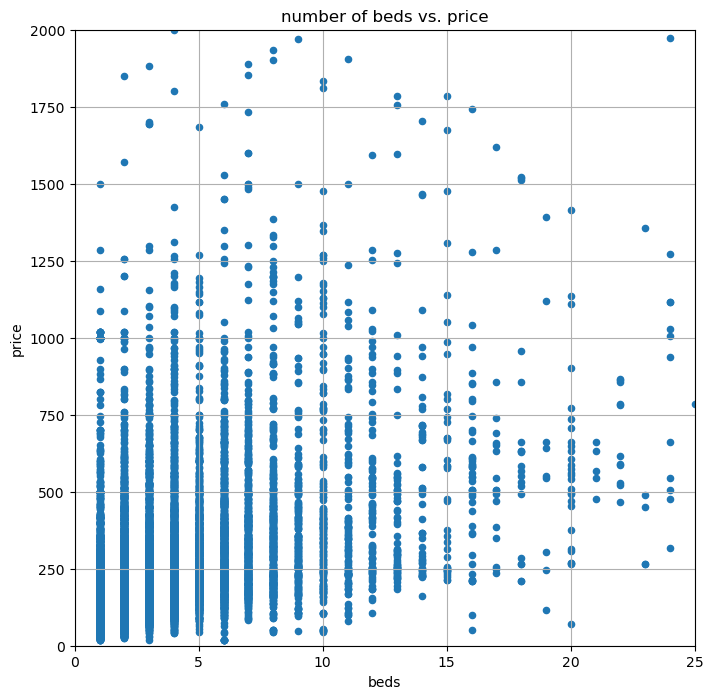

In [10]:
# scatter plot comparing number of beds to price

occ_df.plot(kind='scatter', x='beds', y='price', grid=True, figsize=(8,8),
            title="number of beds vs. price", ylim=(0,2000), xlim=(0,25))
            
plt.show()

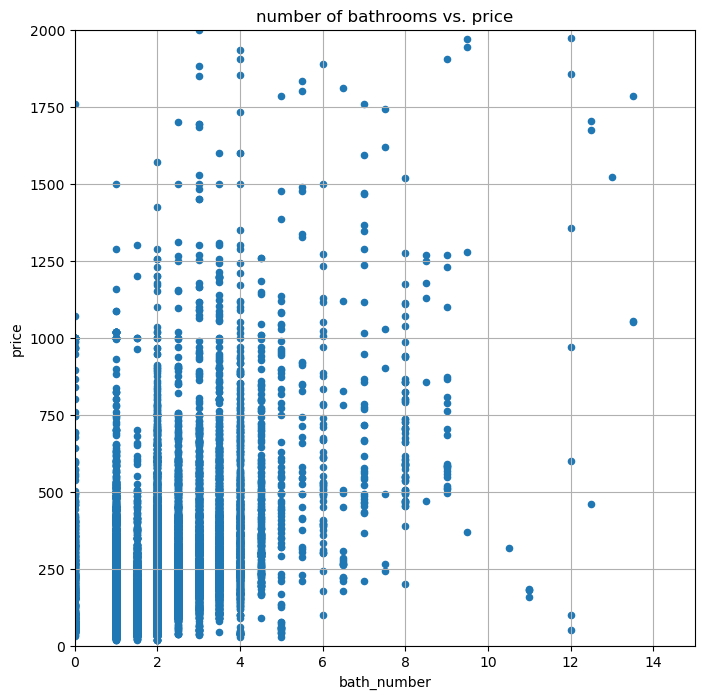

In [11]:
# scatter plot comparing number of bathrooms to price

occ_df.plot(kind='scatter', x='bath_number', y='price', grid=True, figsize=(8,8),
            title="number of bathrooms vs. price", ylim=(0,2000), xlim=(0,15))
            
plt.show()

In [12]:
###############################################################################################################################

In [13]:
# Use Pandas to calculate the quartiles, IQR, and median
quartiles = occ_df['bath_number'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of number of bathrooms is: {lowerq}")
print(f"The upper quartile of number of bathrooms is: {upperq}")
print(f"The interquartile range of number of bathrooms is: {iqr}")
print(f"The the median of number of bathrooms is: {quartiles[0.5]} ")

The lower quartile of number of bathrooms is: 1.0
The upper quartile of number of bathrooms is: 2.0
The interquartile range of number of bathrooms is: 1.0
The the median of number of bathrooms is: 1.0 


In [14]:
# check max and min price value
max_value = occ_df['bath_number'].max()
min_value = occ_df['bath_number'].min()
print(max_value)
print(min_value)

18.0
0.0


In [15]:
# use the IQR to determine upper/lower bound for outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below -0.5 could be outliers.
Values above 3.5 could be outliers.


In [23]:
# Look at correlation between price, bath number, occupancy, and beds.

occ_for_corr_df = pd.DataFrame(occ_df[["price", "bath_number", "beds", "accommodates"]])
occ_corr = occ_for_corr_df.corr()
occ_corr.unstack().sort_values()

price         beds            0.101056
beds          price           0.101056
price         accommodates    0.111440
accommodates  price           0.111440
price         bath_number     0.113429
bath_number   price           0.113429
              beds            0.733560
beds          bath_number     0.733560
bath_number   accommodates    0.739236
accommodates  bath_number     0.739236
beds          accommodates    0.824436
accommodates  beds            0.824436
price         price           1.000000
bath_number   bath_number     1.000000
beds          beds            1.000000
accommodates  accommodates    1.000000
dtype: float64

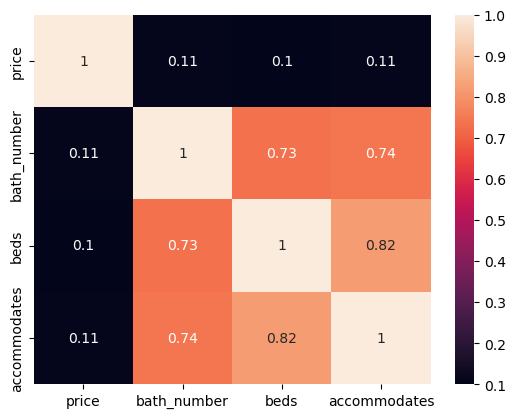

In [24]:
# There is a correlation between the number of beds and the number of baths, but neither correlates to price
# create heatmap to visualize

matrix = occ_corr.round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [25]:
occ_for_corr_df

,price,bath_number,beds,accommodates
id,,,,
360,90.0,1.0,2.0,3
364,179.0,1.5,1.0,3
590,64.0,1.0,1.0,3
592,57.0,1.0,1.0,2
686,33.0,1.0,2.0,2
...,...,...,...,...
979474665987354279,258.0,2.0,4.0,8
980422903985425172,99.0,1.0,2.0,3
980439098128842446,165.0,2.5,3.0,6


In [19]:
###############################################################################################################################

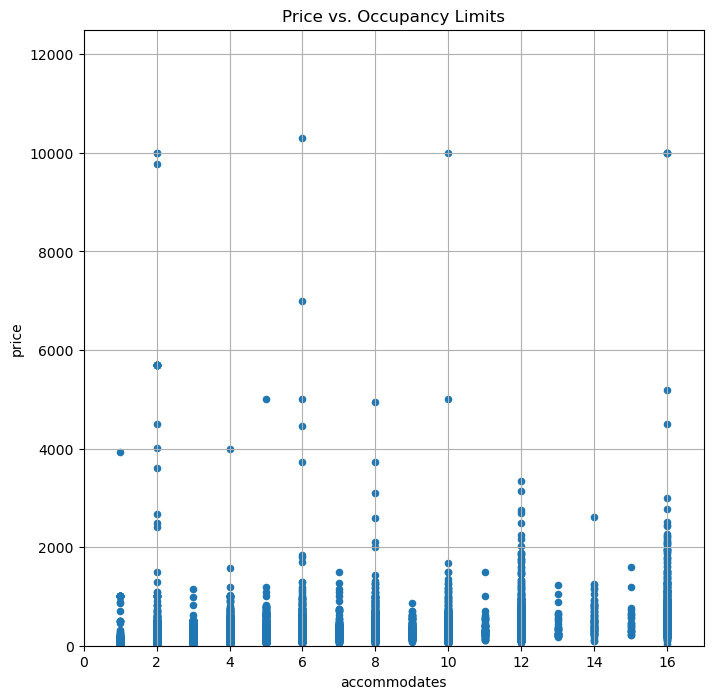

In [22]:
# Look at occupancy ('accomodates' column) as relates to price

occ_df.plot(kind="scatter", x="accommodates", y="price", grid=True, figsize=(8,8), 
            title="Price vs. Occupancy Limits", ylim=(0,12500), xlim=(0,17))
plt.show()

In [ ]:
##############################################################################################################################